## Intermediate Pandas





Today we look at some ways to use Pandas DataFrames like databases. It is much more convenient to do this with Pandas than numpy arrays, but it means learning a lot more stuff.





### Revisiting a previous example with batches of data





We start with the example we looked at before. It is a dataset from a set of experiments. The experiments are grouped by the Day they were run on. We will use Pandas to do some analysis by the day.





In [1]:
import pandas as pd
df = pd.read_csv('p-t.dat', delimiter='\s+', skiprows=2,
                 names=['Run order', 'Day', 'Ambient Temperature', 'Temperature',
                        'Pressure', 'Fitted Value', 'Residual'])
df



,Run order,Day,Ambient Temperature,Temperature,Pressure,Fitted Value,Residual
0,1,1,23.820,54.749,225.066,222.920,2.146
1,2,1,24.120,23.323,100.331,99.411,0.920
2,3,1,23.434,58.775,230.863,238.744,-7.881
3,4,1,23.993,25.854,106.160,109.359,-3.199
4,5,1,23.375,68.297,277.502,276.165,1.336
5,6,1,23.233,37.481,148.314,155.056,-6.741
6,7,1,24.162,49.542,197.562,202.456,-4.895
7,8,1,23.667,34.101,138.537,141.770,-3.232
8,9,1,24.056,33.901,137.969,140.983,-3.014
9,10,1,22.786,29.242,117.410,122.674,-5.263


Suppose we want to get information about different days. Let's do some work by hand.



In [2]:
df['Day'] == 1



0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
Name: Day, dtype: bool

We can get all kinds of data on this.



In [3]:
df[df['Day'] == 1].describe()



,Run order,Day,Ambient Temperature,Temperature,Pressure,Fitted Value,Residual
count,10.00000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,1.0,23.664600,41.526500,167.971400,170.953800,-2.982300
std,3.02765,0.0,0.451572,15.314514,60.729795,60.188312,3.452383
min,1.00000,1.0,22.786000,23.323000,100.331000,99.411000,-7.881000
25%,3.25000,1.0,23.389750,30.406750,122.549750,127.251250,-5.171000
50%,5.50000,1.0,23.743500,35.791000,143.425500,148.413000,-3.215500
75%,7.75000,1.0,24.040250,53.447250,218.190000,217.804000,-0.063500
max,10.00000,1.0,24.162000,68.297000,277.502000,276.165000,2.146000


We can use a list comprehension to loop over the days and get an average for each one.



In [4]:
[df[df['Day'] == x][['Temperature', 'Ambient Temperature', 'Pressure']].mean() for x in [1, 2, 3, 4]]



[Temperature             41.5265
 Ambient Temperature     23.6646
 Pressure               167.9714
 dtype: float64,
 Temperature             52.8839
 Ambient Temperature     23.7758
 Pressure               218.2727
 dtype: float64,
 Temperature             41.7248
 Ambient Temperature     24.2883
 Pressure               171.0646
 dtype: float64,
 Temperature             41.6542
 Ambient Temperature     23.5207
 Pressure               172.4246
 dtype: float64]

In [5]:
[df[df['Day'] == x]['Temperature'].std() for x in [1, 2, 3, 4]]


[15.314514351860241,
 12.140698089483982,
 12.258366755449567,
 12.695813962790169]

You can aggregate or collect statistical properties.

In [6]:
[df[df['Day'] == x]['Temperature'].agg(['mean', 'std']) for x in [1, 2, 3, 4]]

[mean    41.526500
 std     15.314514
 Name: Temperature, dtype: float64,
 mean    52.883900
 std     12.140698
 Name: Temperature, dtype: float64,
 mean    41.724800
 std     12.258367
 Name: Temperature, dtype: float64,
 mean    41.654200
 std     12.695814
 Name: Temperature, dtype: float64]

It is a little inconvenient to have to know all the days. We can get them from the dataframe itself.



In [7]:
import numpy as np
np.unique(df['Day'])

array([1, 2, 3, 4])

In [8]:
set(df['Day'])

{1, 2, 3, 4}

In [9]:
u = []
for day in df['Day']:
    if day not in u:
        u += [day]
u        

[1, 2, 3, 4]

In [10]:
u = {}
for day in df['Day']:
    if day not in u:
        u[day] = True
list(u.keys())

[1, 2, 3, 4]

In [11]:
df['Day'].unique()



array([1, 2, 3, 4])

Finally, we can put it all together to get the mean of a single column grouped by day.



In [12]:
[df[df['Day'] == x]['Temperature'].mean() for x in df['Day'].unique()]



[41.5265, 52.8839, 41.7248, 41.6542]

In [13]:
results = []
for x in df['Day'].unique():
    results.append(df[df['Day']==x]['Temperature'].mean())
results    

[41.5265, 52.8839, 41.7248, 41.6542]

That was an exploratory approach that was somewhat motivated by the approach we would use in Numpy.  Next, we look at the Pandas way.



The first aggregation we will look at is how to make groups of data that are related by values in a column.  We use the `groupby` function ([https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby)), and specify a column to group on. The result is a `DataFrameGroupBy` object, which we next have to work with.





In [14]:
grps = df.groupby('Day')
type(grps)
grps.groups



{1: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 2: [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 3: [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 4: [30, 31, 32, 33, 34, 35, 36, 37, 38, 39]}

In [15]:
groups = df.groupby('Day')

The groups can describe themselves. Here we see we get 4 groups, one for each day, and you can see some statistics about each group. We do not need those for now.





In [16]:
groups.describe()



Run order                                                 \
        count  mean      std   min    25%   50%    75%   max   
Day                                                            
1        10.0   5.5  3.02765   1.0   3.25   5.5   7.75  10.0   
2        10.0  15.5  3.02765  11.0  13.25  15.5  17.75  20.0   
3        10.0  25.5  3.02765  21.0  23.25  25.5  27.75  30.0   
4        10.0  35.5  3.02765  31.0  33.25  35.5  37.75  40.0   

    Ambient Temperature           ... Fitted Value          Residual          \
                  count     mean  ...          75%      max    count    mean   
Day                               ...                                          
1                  10.0  23.6646  ...    217.80400  276.165     10.0 -2.9823   
2                  10.0  23.7758  ...    244.69725  278.040     10.0  2.6827   
3                  10.0  24.2883  ...    205.81225  225.282     10.0 -0.6690   
4                  10.0  23.5207  ...    206.10075  231.697     10.0  0.9687   

                                                       
          std    min      25%     50%      75%    max  
Day                                                    
1    3.452383 -7.881 -5.17100 -3.2155 -0.06350  2.146  
2    3.606824 -2.940 -0.23075  3.2250  5.23400  8.388  
3    3.948274 -7.276 -2.57775  0.0305  2.13900  4.998  
4    4.255487 -8.902  0.55950  1.4060  2.40275  8.199  

[4 rows x 48 columns]

In [17]:
groups['Temperature'].agg(['mean', 'std'])

,mean,std
Day,,
1,41.5265,15.314514
2,52.8839,12.140698
3,41.7248,12.258367
4,41.6542,12.695814


In [18]:
groups['Temperature'].describe()[['mean', 'std']]

,mean,std
Day,,
1,41.5265,15.314514
2,52.8839,12.140698
3,41.7248,12.258367
4,41.6542,12.695814


We can get a dictionary of the group names and labels from the groups attribute.





In [19]:
type(groups.groups)



pandas.io.formats.printing.PrettyDict

We can get the subset of rows from those group labels.





In [20]:
groups.groups[2]

Int64Index([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')

In [21]:
df.loc[groups.groups[2]]



,Run order,Day,Ambient Temperature,Temperature,Pressure,Fitted Value,Residual
10,11,2,23.785,39.506,164.442,163.013,1.429
11,12,2,22.987,43.004,181.044,176.759,4.285
12,13,2,23.799,53.226,222.179,216.933,5.246
13,14,2,23.661,54.467,227.010,221.813,5.198
14,15,2,23.852,57.549,232.496,233.925,-1.429
15,16,2,23.379,61.204,253.557,248.288,5.269
16,17,2,24.146,31.489,139.894,131.506,8.388
17,18,2,24.187,68.476,273.931,276.871,-2.940
18,19,2,24.159,51.144,207.969,208.753,-0.784
19,20,2,23.803,68.774,280.205,278.040,2.165


We don't usually work with groups that way though, it is more common to do some analysis on each group.

Suppose we want to plot the Pressure vs Temperature for each group, so we can see visually if there are any trends that could be attributed to the group. To do this, we need to *iterate* over the groups and then make a plot on each one.

A `DataFrameGroupBy` is *iterable* and when you loop over it, you get the `key` it was grouped on, and a DataFrame that contains the items in the group. Here we loop over each group, and plot each group with a different color.





In [22]:
for x in groups:
    name, group = x
    print(type(x), name, group['Temperature'].mean())

<class 'tuple'> 1 41.5265
<class 'tuple'> 2 52.8839
<class 'tuple'> 3 41.7248
<class 'tuple'> 4 41.6542


In [23]:
?np.polyfit

Signature: np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
Docstring:
Least squares polynomial fit.

.. note::
   This forms part of the old polynomial API. Since version 1.4, the
   new polynomial API defined in `numpy.polynomial` is preferred.
   A summary of the differences can be found in the
   :doc:`transition guide </reference/routines.polynomials>`.

Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
to points `(x, y)`. Returns a vector of coefficients `p` that minimises
the squared error in the order `deg`, `deg-1`, ... `0`.

The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
method is recommended for new code as it is more stable numerically. See
the documentation of the method for more information.

Parameters
----------
x : array_like, shape (M,)
    x-coordinates of the M sample points ``(x[i], y[i])``.
y : array_like, shape (M,) or (M, K)
    y-coordinates of the sample points. Several data sets of sample
    poi

[3.95920051 3.55966018]
[ 3.7765244  18.55536107]
[3.86024559 9.99662475]
[ 3.88353354 10.65911717]


3.5

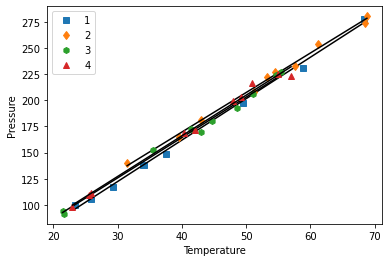

In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
symbols = {1: 's', 2: 'd', 3: 'h', 4: '^'}
for (day, group) in groups:
    group.plot('Temperature', 'Pressure', ax=ax, label=f'{day}', style=symbols[day])
    x = group['Temperature']
    y = group['Pressure']
    pars = np.polyfit(x, y, 1)
    print(pars)
    xfit = np.linspace(x.min(), x.max())
    plt.plot(xfit, np.polyval(pars, xfit), 'k-')
plt.ylabel('Pressure');

(275 - 100) / (70 - 20) # estimated slope from graph

the point of this is we cannot see a visual clustering of the groups by day. That is important, because if we did it could suggest something was different that day.





### Combining data sets





Siddhant Lambor provided from two experiments conducted to measure the properties of a worm-like micelles solution. He had carried out experiments on a rheometer to measure the viscosity of a worm-like micelles solution in a Couette cell geometry and a Cone and Plate geometry. Ideally, there should not be a difference as viscosity is intrinsic to the fluid. Analysis of this data will confirm if that is true. First, we read this data in from the two data files.





In [25]:
import pandas as pd
couette = pd.read_excel('couette.xls',
                   sheet_name='Flow sweep - 1',
                   header=1) # sheet name is case sensitive, excel file name is not

couette



,Stress,Shear rate,Viscosity,Step time,Temperature,Normal stress
0,Pa,1/s,Pa.s,s,°C,Pa
1,0.009981,0.04953,0.201504,35.1469,25.001,-0.001263
2,0.015817,0.079875,0.198028,70.1689,25.001,-0.000835
3,0.025071,0.127313,0.196926,105.253,25,-0.000913
4,0.039734,0.204094,0.194685,140.26,25,-0.001132
5,0.062977,0.327253,0.192442,175.313,25,-0.002026
6,0.099806,0.530364,0.188183,210.32,24.998,-0.002429
7,0.158165,0.875494,0.180658,245.373,25,-0.001837
8,0.250637,1.49135,0.168061,280.426,25.002,-0.001655
9,0.397131,2.64707,0.150027,315.433,25.001,-0.001889


We can drop the row at index 0, it just has the units in it. With this syntax, we have to save the resulting DataFrame back into the variable, or it will not be changed.





In [26]:
couette = couette.drop(0)
couette



,Stress,Shear rate,Viscosity,Step time,Temperature,Normal stress
1,0.009981,0.04953,0.201504,35.1469,25.001,-0.001263
2,0.015817,0.079875,0.198028,70.1689,25.001,-0.000835
3,0.025071,0.127313,0.196926,105.253,25,-0.000913
4,0.039734,0.204094,0.194685,140.26,25,-0.001132
5,0.062977,0.327253,0.192442,175.313,25,-0.002026
6,0.099806,0.530364,0.188183,210.32,24.998,-0.002429
7,0.158165,0.875494,0.180658,245.373,25,-0.001837
8,0.250637,1.49135,0.168061,280.426,25.002,-0.001655
9,0.397131,2.64707,0.150027,315.433,25.001,-0.001889
10,0.629111,5.00904,0.125595,350.501,25.003,-0.002233


There is a second file called cp.xls we want to combine with this. Here, we combine the drop function all into one line.





In [27]:
conePlate = pd.read_excel('cp.xls', sheet_name='Flow sweep - 1', header=1).drop(0)
conePlate.head(5)



,Stress,Shear rate,Viscosity,Step time,Temperature,Normal stress
1,0.009984,0.053193,0.187693,34.9909,25,1.2658
2,0.015822,0.082,0.19295,70.0909,25.001,0.569149
3,0.025078,0.129969,0.192952,105.16,25,0.295899
4,0.039759,0.20176,0.19706,140.213,25,1.0171
5,0.062988,0.336087,0.187415,175.282,25,0.546196


For this analysis, we are only interested in the shear rate, stress and viscosity values. Let us drop the other columns. We do that by the names, and specify inplace=True, which modifies the DataFrame itself.





In [28]:
conePlate.drop(['Temperature', 'Step time', 'Normal stress'], axis=1, inplace=True)
# if we do not use inplace=True, the data frame will not be changed. It would by default create a new data frame
# and we would have to assign a different variable to capture this change.
conePlate.head(5)



,Stress,Shear rate,Viscosity
1,0.009984,0.053193,0.187693
2,0.015822,0.082,0.19295
3,0.025078,0.129969,0.192952
4,0.039759,0.20176,0.19706
5,0.062988,0.336087,0.187415


We also do that for the couette data. Here we did not use `inplace=True`, so we have to save the result back into the variable to get the change.





In [29]:
couette = couette.drop(['Temperature', 'Step time', 'Normal stress'], axis=1)   # without using inplace = True
couette.head(5)



,Stress,Shear rate,Viscosity
1,0.009981,0.04953,0.201504
2,0.015817,0.079875,0.198028
3,0.025071,0.127313,0.196926
4,0.039734,0.204094,0.194685
5,0.062977,0.327253,0.192442


We can see info about each DataFrame like this.





In [30]:
couette.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 1 to 14
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Stress      14 non-null     object
 1   Shear rate  14 non-null     object
 2   Viscosity   14 non-null     object
dtypes: object(3)
memory usage: 468.0+ bytes


In [31]:
conePlate.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 1 to 17
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Stress      17 non-null     object
 1   Shear rate  17 non-null     object
 2   Viscosity   17 non-null     object
dtypes: object(3)
memory usage: 540.0+ bytes


We could proceed to analyze the DataFrames separately, but instead, we will combine them into one DataFrame. Before doing that, we need to add a column to each one so we know which data set is which. Simply assigning a value to a new column name will do that.





In [32]:
couette['type'] = 'couette'
couette



,Stress,Shear rate,Viscosity,type
1,0.009981,0.04953,0.201504,couette
2,0.015817,0.079875,0.198028,couette
3,0.025071,0.127313,0.196926,couette
4,0.039734,0.204094,0.194685,couette
5,0.062977,0.327253,0.192442,couette
6,0.099806,0.530364,0.188183,couette
7,0.158165,0.875494,0.180658,couette
8,0.250637,1.49135,0.168061,couette
9,0.397131,2.64707,0.150027,couette
10,0.629111,5.00904,0.125595,couette


In [33]:
conePlate['type'] = 'cone'
conePlate


,Stress,Shear rate,Viscosity,type
1,0.009984,0.053193,0.187693,cone
2,0.015822,0.082,0.19295,cone
3,0.025078,0.129969,0.192952,cone
4,0.039759,0.20176,0.19706,cone
5,0.062988,0.336087,0.187415,cone
6,0.09982,0.556749,0.179291,cone
7,0.15819,0.925403,0.170942,cone
8,0.250701,1.57526,0.159148,cone
9,0.397263,2.782,0.142798,cone
10,0.629346,5.16333,0.121888,cone


Now, we can combine these into a single DataFrame. This is not critical, and you can get by without it, but I want to explore the idea, and illustrate it is possible.





In [34]:
df = pd.concat([conePlate, couette])
df



,Stress,Shear rate,Viscosity,type
1,0.009984,0.053193,0.187693,cone
2,0.015822,0.082,0.19295,cone
3,0.025078,0.129969,0.192952,cone
4,0.039759,0.20176,0.19706,cone
5,0.062988,0.336087,0.187415,cone
6,0.09982,0.556749,0.179291,cone
7,0.15819,0.925403,0.170942,cone
8,0.250701,1.57526,0.159148,cone
9,0.397263,2.782,0.142798,cone
10,0.629346,5.16333,0.121888,cone


Finally, we are ready for the visualization. We will group the DataFrame and then make plots for each group. Here we illustrate several new arguments, including loglog plots, secondary axes, colored tick labels, and multiple legends.





/opt/tljh/user/lib/python3.9/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


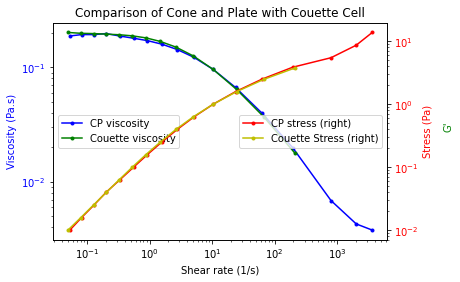

In [46]:
import matplotlib.pyplot as plt
g = df.groupby('type')
ax1 = g.get_group('cone').plot('Shear rate', 'Viscosity',
                               logx=True, logy=True, style='b.-',
                               label="CP viscosity")

g.get_group('couette').plot('Shear rate', 'Viscosity', logx=True, logy=True,
                            style='g.-', ax=ax1, label="Couette viscosity")

ax2 = g.get_group('cone').plot('Shear rate', 'Stress', secondary_y=True,
                               logx=True, logy=True, style='r.-',
                               ax=ax1, label="CP stress")

g.get_group('couette').plot('Shear rate', 'Stress', secondary_y=True,
                            logx=True, logy = True, style='y.-', ax=ax2,
                            label="Couette Stress")

# Setting y axis labels
ax1.set_ylabel("Viscosity (Pa.s)", color='b')
[ticklabel.set_color('b') for ticklabel in ax1.get_yticklabels()]

ax2.set_ylabel("Stress (Pa)", color='r')
#ax2.set_ylabel(r'\textcolor{red}{easily}')
[ticklabel.set_color('r') for ticklabel in ax2.get_yticklabels()]

# setting legend locations
ax1.legend(loc=6)
ax2.legend(loc=7)

ax1.set_xlabel("Shear rate (1/s)")
plt.title("Comparison of Cone and Plate with Couette Cell");

plt.text(5e4,0.4, "G'", color='green', rotation='90');

So, in fact we can see these two experiments are practically equivalent.



